# Import Library

In [1]:
import os
import pandas as pd

# Load Datasets

In [2]:
def load_datasets_from_folder(folder_path):
    datasets = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            datasets.append(df)
    return datasets

In [3]:
folder_path = 'Datasets'
datasets = load_datasets_from_folder(folder_path)

# Checking the Datasets Imported

In [4]:
datasets[1].head()  # Display the first few rows of the first dataset

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,Badda dhaka,2023-01-01T00:00:00,16.8,16.8,14.4,85.79,0.0,0.0,NaN,0,...,1018.7,0.0,2.3,0,0.0,0,10,Clear,clear-night,"VGHS,41923099999,41922099999"
1,Badda dhaka,2023-01-01T01:00:00,18.5,18.5,16.0,85.56,0.0,0.0,NaN,0,...,1018.0,0.0,1.0,0,0.0,0,10,Clear,clear-night,"VGHS,41922099999"
2,Badda dhaka,2023-01-01T02:00:00,18.0,18.0,16.0,88.10,0.0,0.0,NaN,0,...,1017.5,0.0,1.0,0,0.0,0,10,Clear,clear-night,"VGHS,41922099999"
3,Badda dhaka,2023-01-01T03:00:00,15.5,15.5,14.4,93.21,0.0,0.0,NaN,0,...,1018.3,0.0,1.7,0,0.0,0,10,Clear,clear-night,"VGHS,41941099999,41923099999,41929099999,41922..."
4,Badda dhaka,2023-01-01T04:00:00,16.5,16.5,15.5,93.81,0.0,0.0,NaN,0,...,1018.0,89.1,0.5,0,0.0,0,10,Partially cloudy,fog,"VGHS,41922099999"


In [5]:
datasets[6].info()  # Display information about the first dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14616 entries, 0 to 14615
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              14616 non-null  object 
 1   datetime          14616 non-null  object 
 2   temp              14616 non-null  float64
 3   feelslike         14616 non-null  float64
 4   dew               14616 non-null  float64
 5   humidity          14616 non-null  float64
 6   precip            14616 non-null  float64
 7   precipprob        14616 non-null  float64
 8   preciptype        3224 non-null   object 
 9   snow              14616 non-null  int64  
 10  snowdepth         14616 non-null  int64  
 11  windgust          14616 non-null  float64
 12  windspeed         14616 non-null  float64
 13  winddir           14616 non-null  float64
 14  sealevelpressure  14616 non-null  float64
 15  cloudcover        14616 non-null  float64
 16  visibility        14616 non-null  float6

# Making New Datasets

In [6]:
# crate a new dataframe
finalDataset = pd.DataFrame()
finalDataset

""


## Insert Date & Time

In [7]:
# Convert to pandas datetime
finalDataset['DateTime'] = pd.to_datetime(datasets[0]['datetime'])

In [8]:
finalDataset

,DateTime
0,2023-01-01 00:00:00
1,2023-01-01 01:00:00
2,2023-01-01 02:00:00
3,2023-01-01 03:00:00
4,2023-01-01 04:00:00
...,...
14611,2024-08-31 19:00:00
14612,2024-08-31 20:00:00
14613,2024-08-31 21:00:00
14614,2024-08-31 22:00:00


In [9]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14616 entries, 0 to 14615
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  14616 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 114.3 KB


## Adding New Features

In [10]:
finalDataset['Year'] = finalDataset['DateTime'].dt.year.astype(int)
finalDataset['Month'] = finalDataset['DateTime'].dt.month.astype(int)
finalDataset['Day'] = finalDataset['DateTime'].dt.day.astype(int)
finalDataset['Hour'] = finalDataset['DateTime'].dt.hour.astype(int)

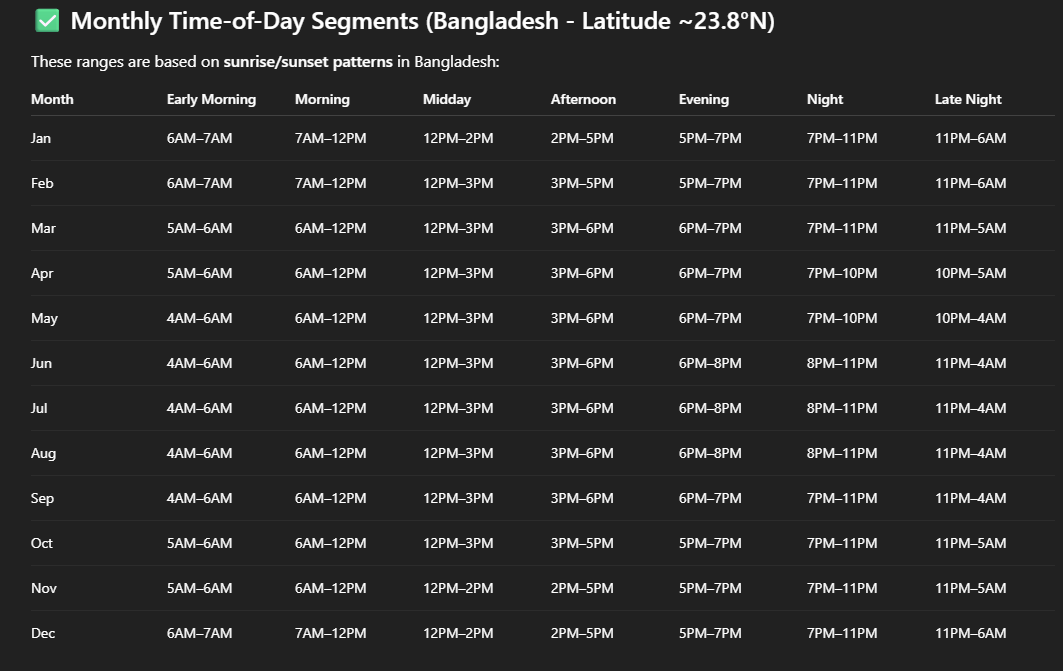

In [11]:
time_of_day_by_month = {
    1:  [('Early Morning', 6, 6), ('Morning', 7, 11), ('Midday', 12, 13), ('Afternoon', 14, 17), ('Evening', 17, 19), ('Night', 19, 22), ('Late Night', 23, 5)],
    2:  [('Early Morning', 6, 6), ('Morning', 7, 11), ('Midday', 12, 14), ('Afternoon', 15, 17), ('Evening', 17, 19), ('Night', 19, 22), ('Late Night', 23, 5)],
    3:  [('Early Morning', 5, 5), ('Morning', 6, 11), ('Midday', 12, 14), ('Afternoon', 15, 17), ('Evening', 18, 19), ('Night', 19, 22), ('Late Night', 23, 4)],
    4:  [('Early Morning', 5, 5), ('Morning', 6, 11), ('Midday', 12, 14), ('Afternoon', 15, 17), ('Evening', 18, 19), ('Night', 19, 21), ('Late Night', 22, 4)],
    5:  [('Early Morning', 4, 5), ('Morning', 6, 11), ('Midday', 12, 14), ('Afternoon', 15, 17), ('Evening', 18, 19), ('Night', 19, 21), ('Late Night', 22, 3)],
    6:  [('Early Morning', 4, 5), ('Morning', 6, 11), ('Midday', 12, 14), ('Afternoon', 15, 17), ('Evening', 18, 20), ('Night', 20, 22), ('Late Night', 23, 3)],
    7:  [('Early Morning', 4, 5), ('Morning', 6, 11), ('Midday', 12, 14), ('Afternoon', 15, 17), ('Evening', 18, 20), ('Night', 20, 22), ('Late Night', 23, 3)],
    8:  [('Early Morning', 4, 5), ('Morning', 6, 11), ('Midday', 12, 14), ('Afternoon', 15, 17), ('Evening', 18, 20), ('Night', 20, 22), ('Late Night', 23, 3)],
    9:  [('Early Morning', 4, 5), ('Morning', 6, 11), ('Midday', 12, 14), ('Afternoon', 15, 17), ('Evening', 18, 19), ('Night', 20, 22), ('Late Night', 23, 3)],
    10: [('Early Morning', 5, 5), ('Morning', 6, 11), ('Midday', 12, 14), ('Afternoon', 15, 16), ('Evening', 17, 19), ('Night', 19, 22), ('Late Night', 23, 4)],
    11: [('Early Morning', 5, 5), ('Morning', 6, 11), ('Midday', 12, 13), ('Afternoon', 14, 17), ('Evening', 17, 19), ('Night', 19, 22), ('Late Night', 23, 4)],
    12: [('Early Morning', 6, 6), ('Morning', 7, 11), ('Midday', 12, 13), ('Afternoon', 14, 17), ('Evening', 17, 19), ('Night', 19, 22), ('Late Night', 23, 5)],
}

def get_time_of_day(hour, month):
    for period, start, end in time_of_day_by_month[month]:
        if start <= hour <= end or (start > end and (hour >= start or hour <= end)):
            return period
    return 'Unknown'

finalDataset['DaySegments'] = finalDataset.apply(lambda row: get_time_of_day(row['Hour'], row['Month']), axis=1)

In [12]:
daysegment_dummies = pd.get_dummies(finalDataset['DaySegments'], prefix='DaySegments', prefix_sep='_')
finalDataset = pd.concat([finalDataset, daysegment_dummies], axis=1)
daysegment_cols = [col for col in daysegment_dummies.columns]
finalDataset[daysegment_cols] = finalDataset[daysegment_cols].astype(int)
finalDataset.head()

,DateTime,Year,Month,Day,Hour,DaySegments,DaySegments_Afternoon,DaySegments_Early Morning,DaySegments_Evening,DaySegments_Late Night,DaySegments_Midday,DaySegments_Morning,DaySegments_Night
0,2023-01-01 00:00:00,2023,1,1,0,Late Night,0,0,0,1,0,0,0
1,2023-01-01 01:00:00,2023,1,1,1,Late Night,0,0,0,1,0,0,0
2,2023-01-01 02:00:00,2023,1,1,2,Late Night,0,0,0,1,0,0,0
3,2023-01-01 03:00:00,2023,1,1,3,Late Night,0,0,0,1,0,0,0
4,2023-01-01 04:00:00,2023,1,1,4,Late Night,0,0,0,1,0,0,0


In [13]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Rainy'
    elif month in [9, 10, 11]:
        return 'Autumn'

finalDataset['Season'] = finalDataset['DateTime'].dt.month.map(get_season)

In [14]:
finalDataset

,DateTime,Year,Month,Day,Hour,DaySegments,DaySegments_Afternoon,DaySegments_Early Morning,DaySegments_Evening,DaySegments_Late Night,DaySegments_Midday,DaySegments_Morning,DaySegments_Night,Season
0,2023-01-01 00:00:00,2023,1,1,0,Late Night,0,0,0,1,0,0,0,Winter
1,2023-01-01 01:00:00,2023,1,1,1,Late Night,0,0,0,1,0,0,0,Winter
2,2023-01-01 02:00:00,2023,1,1,2,Late Night,0,0,0,1,0,0,0,Winter
3,2023-01-01 03:00:00,2023,1,1,3,Late Night,0,0,0,1,0,0,0,Winter
4,2023-01-01 04:00:00,2023,1,1,4,Late Night,0,0,0,1,0,0,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14611,2024-08-31 19:00:00,2024,8,31,19,Evening,0,0,1,0,0,0,0,Rainy
14612,2024-08-31 20:00:00,2024,8,31,20,Evening,0,0,1,0,0,0,0,Rainy
14613,2024-08-31 21:00:00,2024,8,31,21,Night,0,0,0,0,0,0,1,Rainy
14614,2024-08-31 22:00:00,2024,8,31,22,Night,0,0,0,0,0,0,1,Rainy


In [15]:
finalDataset = pd.get_dummies(finalDataset, columns=['Season'], prefix='Season', prefix_sep='_', drop_first=False)
finalDataset['Season'] = finalDataset['DateTime'].dt.month.map(get_season)
finalDataset[['Season_Autumn', 'Season_Rainy', 'Season_Summer', 'Season_Winter']] = finalDataset[['Season_Autumn', 'Season_Rainy', 'Season_Summer', 'Season_Winter']].astype(int)
finalDataset.head()

,DateTime,Year,Month,Day,Hour,DaySegments,DaySegments_Afternoon,DaySegments_Early Morning,DaySegments_Evening,DaySegments_Late Night,DaySegments_Midday,DaySegments_Morning,DaySegments_Night,Season_Autumn,Season_Rainy,Season_Summer,Season_Winter,Season
0,2023-01-01 00:00:00,2023,1,1,0,Late Night,0,0,0,1,0,0,0,0,0,0,1,Winter
1,2023-01-01 01:00:00,2023,1,1,1,Late Night,0,0,0,1,0,0,0,0,0,0,1,Winter
2,2023-01-01 02:00:00,2023,1,1,2,Late Night,0,0,0,1,0,0,0,0,0,0,1,Winter
3,2023-01-01 03:00:00,2023,1,1,3,Late Night,0,0,0,1,0,0,0,0,0,0,1,Winter
4,2023-01-01 04:00:00,2023,1,1,4,Late Night,0,0,0,1,0,0,0,0,0,0,1,Winter


## Adding Features Column

In [16]:
finalDataset['Temp'] = pd.concat([df['temp'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['FeelsLike'] = pd.concat([df['feelslike'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['Dew'] = pd.concat([df['dew'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['Humidity'] = pd.concat([df['humidity'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['Precip'] = pd.concat([df['precip'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['PrecipProb'] = pd.concat([df['precipprob'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['Snow'] = pd.concat([df['snow'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['SnowDepth'] = pd.concat([df['snowdepth'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['Windgust'] = pd.concat([df['windgust'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['WindSpeed'] = pd.concat([df['windspeed'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['WindDir'] = pd.concat([df['winddir'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['SeaLevelPressure'] = pd.concat([df['sealevelpressure'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['CloudCover'] = pd.concat([df['cloudcover'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['UVIndex'] = pd.concat([df['uvindex'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['SevereRisk'] = pd.concat([df['severerisk'] for df in datasets], axis=1).mean(axis=1).round(2)

## Adding Target Column

### Regression Target

In [17]:
finalDataset['Visibility'] = pd.concat([df['visibility'] for df in datasets], axis=1).mean(axis=1).round(2)

In [18]:
""" low_threshold_visibility = finalDataset['Visibility'].quantile(0.25)
high_threshold_visibility = finalDataset['Visibility'].quantile(0.75)

def classify_visibility(value):
    if value <= low_threshold_visibility:
        return 'Low'
    elif value <= high_threshold_visibility:
        return 'Medium'
    else:
        return 'High'

finalDataset['Visibility_Class'] = finalDataset['Visibility'].apply(classify_visibility) """

" low_threshold_visibility = finalDataset['Visibility'].quantile(0.25)\nhigh_threshold_visibility = finalDataset['Visibility'].quantile(0.75)\n\ndef classify_visibility(value):\n    if value <= low_threshold_visibility:\n        return 'Low'\n    elif value <= high_threshold_visibility:\n        return 'Medium'\n    else:\n        return 'High'\n\nfinalDataset['Visibility_Class'] = finalDataset['Visibility'].apply(classify_visibility) "

In [19]:
finalDataset['SolarRadiation'] = pd.concat([df['solarradiation'] for df in datasets], axis=1).mean(axis=1).round(2)

In [20]:
""" low_threshold_solarradiation = finalDataset['SolarRadiation'].quantile(0.25)
high_threshold_solarradiation = finalDataset['SolarRadiation'].quantile(0.75)

def classify_solarradiation(value):
    if value <= low_threshold_solarradiation:
        return 'Low'
    elif value <= high_threshold_solarradiation:
        return 'Medium'
    else:
        return 'High'

finalDataset['SolarRadiation_Class'] = finalDataset['SolarRadiation'].apply(classify_solarradiation) """

" low_threshold_solarradiation = finalDataset['SolarRadiation'].quantile(0.25)\nhigh_threshold_solarradiation = finalDataset['SolarRadiation'].quantile(0.75)\n\ndef classify_solarradiation(value):\n    if value <= low_threshold_solarradiation:\n        return 'Low'\n    elif value <= high_threshold_solarradiation:\n        return 'Medium'\n    else:\n        return 'High'\n\nfinalDataset['SolarRadiation_Class'] = finalDataset['SolarRadiation'].apply(classify_solarradiation) "

In [21]:
finalDataset['SolarEnergy'] = pd.concat([df['solarenergy'] for df in datasets], axis=1).mean(axis=1).round(2)

In [22]:
""" low_threshold_solarenergy = finalDataset['SolarEnergy'].quantile(0.25)
high_threshold_solarenergy = finalDataset['SolarEnergy'].quantile(0.75)

def classify_solarenergy(value):
    if value <= low_threshold_solarenergy:
        return 'Low'
    elif value <= high_threshold_solarenergy:
        return 'Medium'
    else:
        return 'High'

finalDataset['SolarEnergy_Class'] = finalDataset['SolarEnergy'].apply(classify_solarenergy) """

" low_threshold_solarenergy = finalDataset['SolarEnergy'].quantile(0.25)\nhigh_threshold_solarenergy = finalDataset['SolarEnergy'].quantile(0.75)\n\ndef classify_solarenergy(value):\n    if value <= low_threshold_solarenergy:\n        return 'Low'\n    elif value <= high_threshold_solarenergy:\n        return 'Medium'\n    else:\n        return 'High'\n\nfinalDataset['SolarEnergy_Class'] = finalDataset['SolarEnergy'].apply(classify_solarenergy) "

In [23]:
# classification
finalDataset['Conditions'] = pd.concat([df['conditions'] for df in datasets], axis=1).mode(axis=1)[0]

In [24]:
unique_conditions = finalDataset['Conditions'].unique()
print(unique_conditions)

['Clear' 'Partially cloudy' 'Overcast' 'Rain, Partially cloudy'
 'Rain, Overcast' 'Rain']


In [25]:
# condition_order = [
#     'Clear',                   # Best visibility, no obstruction
#     'Partially cloudy',        # Slight cloud cover
#     'Overcast',                # Fully cloudy but no rain
#     'Rain, Partially cloudy',  # Mixed condition: rain and some clouds
#     'Rain, Overcast',          # Rain + full cloud cover (worse visibility)
#     'Rain'                     # Only rain — possibly heavy
# ]

# condition_map = {cond: idx for idx, cond in enumerate(condition_order)}
# finalDataset['Conditions_Label'] = finalDataset['Conditions'].map(condition_map)

In [26]:
finalDataset['Icon'] = pd.concat([df['icon'] for df in datasets], axis=1).mode(axis=1)[0]

In [27]:
unique_icon = finalDataset['Icon'].unique()
print(unique_icon)

['clear-night' 'fog' 'partly-cloudy-night' 'partly-cloudy-day' 'clear-day'
 'cloudy' 'rain' 'wind']


In [28]:
# icon_order = [
#     'clear-day',              # Sunny, best condition
#     'clear-night',            # Clear at night, slightly less visibility
#     'partly-cloudy-day',      # Some cloud cover
#     'partly-cloudy-night',    # Some clouds at night
#     'cloudy',                 # Fully overcast, no rain yet
#     'wind',                   # Windy, potential discomfort
#     'fog',                    # Low visibility, dangerous for driving
#     'rain'                    # Worst: precipitation, high impact
# ]

# condition_map = {cond: idx for idx, cond in enumerate(icon_order)}
# finalDataset['Icon_Label'] = finalDataset['Icon'].map(condition_map)

## Check the Final Dataset

In [29]:
finalDataset.head()

,DateTime,Year,Month,Day,Hour,DaySegments,DaySegments_Afternoon,DaySegments_Early Morning,DaySegments_Evening,DaySegments_Late Night,...,WindDir,SeaLevelPressure,CloudCover,UVIndex,SevereRisk,Visibility,SolarRadiation,SolarEnergy,Conditions,Icon
0,2023-01-01 00:00:00,2023,1,1,0,Late Night,0,0,0,1,...,0.49,1018.68,0.03,0.0,10.0,2.76,0.0,0.0,Clear,clear-night
1,2023-01-01 01:00:00,2023,1,1,1,Late Night,0,0,0,1,...,0.54,1018.03,0.11,0.0,10.0,1.75,0.0,0.0,Clear,clear-night
2,2023-01-01 02:00:00,2023,1,1,2,Late Night,0,0,0,1,...,30.51,1017.56,0.03,0.0,10.0,1.75,0.0,0.0,Clear,clear-night
3,2023-01-01 03:00:00,2023,1,1,3,Late Night,0,0,0,1,...,49.23,1018.05,0.00,0.0,10.0,2.28,0.0,0.0,Clear,clear-night
4,2023-01-01 04:00:00,2023,1,1,4,Late Night,0,0,0,1,...,49.90,1018.00,86.17,0.0,10.0,1.27,0.0,0.0,Partially cloudy,fog


In [30]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14616 entries, 0 to 14615
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   14616 non-null  datetime64[ns]
 1   Year                       14616 non-null  int64         
 2   Month                      14616 non-null  int64         
 3   Day                        14616 non-null  int64         
 4   Hour                       14616 non-null  int64         
 5   DaySegments                14616 non-null  object        
 6   DaySegments_Afternoon      14616 non-null  int64         
 7   DaySegments_Early Morning  14616 non-null  int64         
 8   DaySegments_Evening        14616 non-null  int64         
 9   DaySegments_Late Night     14616 non-null  int64         
 10  DaySegments_Midday         14616 non-null  int64         
 11  DaySegments_Morning        14616 non-null  int64         
 12  DayS

## Checking Unique Value Count

In [31]:
unique_counts = finalDataset.nunique()
print(unique_counts)

DateTime                     14616
Year                             2
Month                           12
Day                             31
Hour                            24
DaySegments                      7
DaySegments_Afternoon            2
DaySegments_Early Morning        2
DaySegments_Evening              2
DaySegments_Late Night           2
DaySegments_Midday               2
DaySegments_Morning              2
DaySegments_Night                2
Season_Autumn                    2
Season_Rainy                     2
Season_Summer                    2
Season_Winter                    2
Season                           4
Temp                          2145
FeelsLike                     2945
Dew                           1890
Humidity                      5059
Precip                         350
PrecipProb                      20
Snow                             1
SnowDepth                        1
Windgust                      3815
WindSpeed                     2004
WindDir             

In [32]:
finalDataset = finalDataset.drop(['Snow', 'SnowDepth'], axis=1)

In [33]:
unique_counts = finalDataset.nunique()
print(unique_counts)

DateTime                     14616
Year                             2
Month                           12
Day                             31
Hour                            24
DaySegments                      7
DaySegments_Afternoon            2
DaySegments_Early Morning        2
DaySegments_Evening              2
DaySegments_Late Night           2
DaySegments_Midday               2
DaySegments_Morning              2
DaySegments_Night                2
Season_Autumn                    2
Season_Rainy                     2
Season_Summer                    2
Season_Winter                    2
Season                           4
Temp                          2145
FeelsLike                     2945
Dew                           1890
Humidity                      5059
Precip                         350
PrecipProb                      20
Windgust                      3815
WindSpeed                     2004
WindDir                       9743
SeaLevelPressure              1869
CloudCover          

## Checking the final Datasets

In [34]:
finalDataset.head(5)

,DateTime,Year,Month,Day,Hour,DaySegments,DaySegments_Afternoon,DaySegments_Early Morning,DaySegments_Evening,DaySegments_Late Night,...,WindDir,SeaLevelPressure,CloudCover,UVIndex,SevereRisk,Visibility,SolarRadiation,SolarEnergy,Conditions,Icon
0,2023-01-01 00:00:00,2023,1,1,0,Late Night,0,0,0,1,...,0.49,1018.68,0.03,0.0,10.0,2.76,0.0,0.0,Clear,clear-night
1,2023-01-01 01:00:00,2023,1,1,1,Late Night,0,0,0,1,...,0.54,1018.03,0.11,0.0,10.0,1.75,0.0,0.0,Clear,clear-night
2,2023-01-01 02:00:00,2023,1,1,2,Late Night,0,0,0,1,...,30.51,1017.56,0.03,0.0,10.0,1.75,0.0,0.0,Clear,clear-night
3,2023-01-01 03:00:00,2023,1,1,3,Late Night,0,0,0,1,...,49.23,1018.05,0.00,0.0,10.0,2.28,0.0,0.0,Clear,clear-night
4,2023-01-01 04:00:00,2023,1,1,4,Late Night,0,0,0,1,...,49.90,1018.00,86.17,0.0,10.0,1.27,0.0,0.0,Partially cloudy,fog


In [35]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14616 entries, 0 to 14615
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   14616 non-null  datetime64[ns]
 1   Year                       14616 non-null  int64         
 2   Month                      14616 non-null  int64         
 3   Day                        14616 non-null  int64         
 4   Hour                       14616 non-null  int64         
 5   DaySegments                14616 non-null  object        
 6   DaySegments_Afternoon      14616 non-null  int64         
 7   DaySegments_Early Morning  14616 non-null  int64         
 8   DaySegments_Evening        14616 non-null  int64         
 9   DaySegments_Late Night     14616 non-null  int64         
 10  DaySegments_Midday         14616 non-null  int64         
 11  DaySegments_Morning        14616 non-null  int64         
 12  DayS

In [36]:
finalDataset.describe()

,DateTime,Year,Month,Day,Hour,DaySegments_Afternoon,DaySegments_Early Morning,DaySegments_Evening,DaySegments_Late Night,DaySegments_Midday,...,Windgust,WindSpeed,WindDir,SeaLevelPressure,CloudCover,UVIndex,SevereRisk,Visibility,SolarRadiation,SolarEnergy
count,14616,14616.000000,14616.000000,14616.000000,14616.000000,14616.000000,14616.000000,14616.000000,14616.000000,14616.000000,...,14616.000000,14616.000000,14616.000000,14616.000000,14616.000000,14616.000000,14616.000000,14616.000000,14616.000000,14616.000000
mean,2023-11-01 11:30:00,2023.400657,5.720854,15.735632,11.500000,0.131294,0.060550,0.098043,0.249726,0.116585,...,17.068560,8.090783,159.739178,1008.265012,53.579923,2.263555,16.504787,4.368134,227.640683,0.819217
min,2023-01-01 00:00:00,2023.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.660000,0.000000,0.000000,982.420000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,2023-06-02 05:45:00,2023.000000,3.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.170000,2.870000,80.965000,1003.277500,26.670000,0.000000,10.000000,3.990000,0.000000,0.000000
50%,2023-11-01 11:30:00,2023.000000,6.000000,16.000000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.645000,7.670000,163.790000,1007.970000,51.540000,0.000000,10.000000,4.650000,10.665000,0.010000
75%,2024-04-01 17:15:00,2024.000000,8.000000,23.000000,17.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.410000,11.750000,241.402500,1013.400000,87.790000,4.740000,12.580000,4.650000,459.745000,1.660000
max,2024-08-31 23:00:00,2024.000000,12.000000,31.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,84.120000,71.970000,360.000000,1022.060000,100.000000,10.000000,97.740000,24.100000,1026.650000,3.700000
std,NaN,0.490048,3.195073,8.803610,6.922423,0.337734,0.238511,0.297383,0.432869,0.320936,...,10.195911,6.250203,104.422027,6.010683,35.166637,3.083074,15.031827,1.376994,307.219387,1.106444


# Features Details

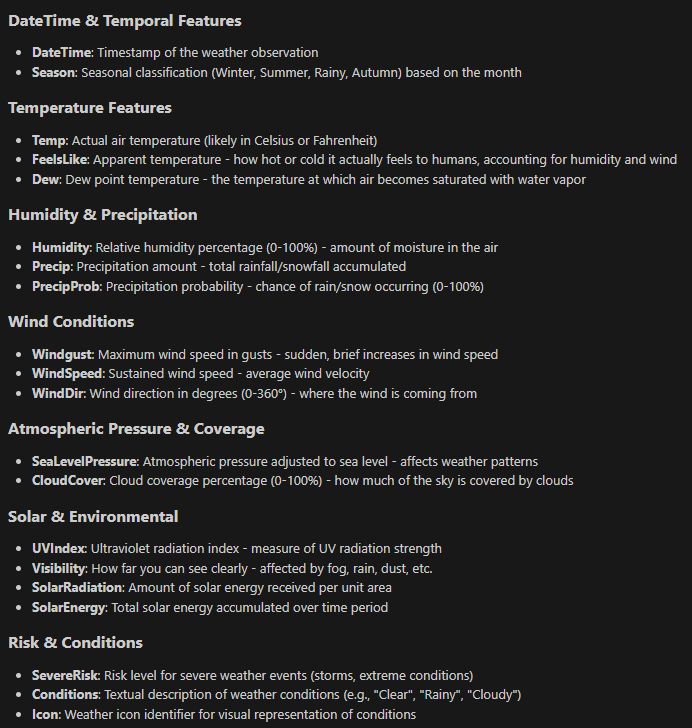

# Save the Datasets

In [37]:
# save the final dataset to a CSV file
finalDataset.to_csv('FinalDatasets/finalDataset.csv', index=False)

# <center><font size="50" color="red">Thank You</font></center>